In [4]:
import numpy as np # 导入NumPy
import pandas as pd # 导入pandas
dataset = pd.read_csv('../dataset/Customers Cluster.csv')
dataset.head() # 显示一些数据


,ID,Gender,Age,Income,Spending
0,1,Female,47,600240,0.16
1,2,Male,60,150060,0.04
2,3,Male,63,240096,0.51
3,4,Male,48,270108,0.46
4,5,Female,35,105042,0.35


In [6]:
# 只针对两个特征进行聚类，以方便二维的展示
X = dataset.iloc[:, [3,4]].values


In [7]:
from sklearn.cluster import KMeans # 导入聚类模型
cost=[] # 初始化损失(距离)值
for i in range(1,11): # 尝试不同的K值
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    cost.append(kmeans.inertia_) #inertia_ 是我们选择的方法，其作用相当于损失函数

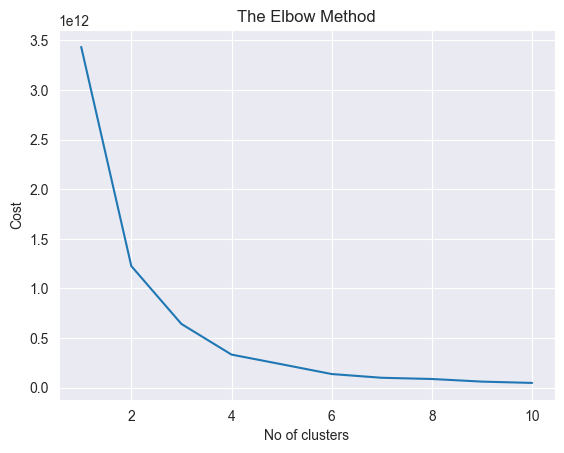

In [8]:
import matplotlib.pyplot as plt # 导入matplotlib库 
import seaborn as sns  # 导入seaborn库
# 绘制ELBOW（手肘）图找到最佳K值 
plt.plot(range(1,11), cost)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Cost')
plt.show()

In [9]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++') # 选择4作为聚类个数
y_kmeans= kmeansmodel.fit_predict(X) # 进行聚类的拟合和分类

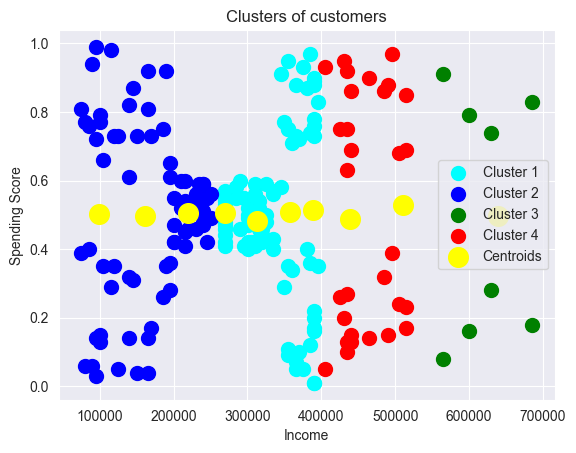

In [10]:
# 下面把分好的聚类可视化
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'cyan', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], 
            s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], 
            s = 100, c = 'red', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()